# Scope

I want to create some notes about the LSTM problems

We will follow this [link](https://www.youtube.com/watch?v=QIUxPv5PJOY) with additional info

In [1]:
import numpy as np
import pandas_datareader as web
import pandas as pd
import matplotlib.pyplot as plt
import math

/home/lorenzo/Documents/learning/LSTM/.LSTM/lib/python3.6/site-packages/pandas_datareader/compat/__init__.py:7: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  from pandas.util.testing import assert_frame_equal


In [2]:
df = web.DataReader('AAPL', data_source='yahoo', start='2012-01-01', end='2019-12-17')

In [3]:
df.head()

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2012-01-03,58.928570,58.428570,58.485714,58.747143,75555200.0,50.994907
2012-01-04,59.240002,58.468571,58.571430,59.062859,65005500.0,51.268970
2012-01-05,59.792858,58.952858,59.278572,59.718571,67817400.0,51.838169
2012-01-06,60.392857,59.888573,59.967144,60.342857,79573200.0,52.380054
2012-01-09,61.107143,60.192856,60.785713,60.247143,98506100.0,52.296970


In [4]:
df.describe()

,High,Low,Open,Close,Volume,Adj Close
count,2003.000000,2003.000000,2003.000000,2003.000000,2.003000e+03,2003.000000
mean,127.194100,124.954538,126.079166,126.109797,5.960691e+07,119.389611
std,50.028310,49.234509,49.592770,49.679272,4.688887e+07,51.745687
min,57.085712,55.014286,55.424286,55.790001,1.136200e+07,49.142811
25%,86.649998,84.915001,85.766430,85.971428,2.760790e+07,75.313698
50%,114.019997,111.660004,112.820000,112.919998,4.369990e+07,105.513168
75%,165.939995,162.125000,163.845001,163.970001,7.482090e+07,158.767662
max,281.769989,278.799988,279.570007,280.410004,3.765300e+08,279.746094


We want now to visualize the closing prices

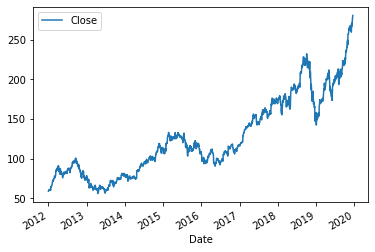

In [5]:
df.plot(y = 'Close')

In [6]:
# We use just the close columns for the next dataframe

In [7]:
df_cp = pd.DataFrame(df['Close'])

In [8]:
df_cp

,Close
Date,
2012-01-03,58.747143
2012-01-04,59.062859
2012-01-05,59.718571
2012-01-06,60.342857
2012-01-09,60.247143
...,...
2019-12-11,270.769989
2019-12-12,271.459991
2019-12-13,275.149994


In [9]:
# We then convert it to a numpy array

In [10]:
data = df_cp.to_numpy()

In [11]:
data

array([[ 58.74714279],
       [ 59.06285858],
       [ 59.71857071],
       ...,
       [275.1499939 ],
       [279.85998535],
       [280.41000366]])

In [12]:
def train_test_split(dataset, percentage=0.8):
    return dataset[:math.ceil(len(dataset)*percentage)], dataset[math.ceil(len(dataset)*percentage):] 

In [13]:
train_dataset, test_dataset = train_test_split(data)

In [14]:
print(len(train_dataset),
len(test_dataset),
len(data))

1603 400 2003


# Scale the data

Before to run whatever machine learning  model we want, we need to try to scale the data in a way that is good for the traning.
We are going to use the scikitlearn Scaler package, which is an highly recommended choice.
The video has an error at this point.

In [15]:
from sklearn.preprocessing import MinMaxScaler

In [16]:
# We then define the scaler and we apply it
scaler = MinMaxScaler()
scaler.fit(train_dataset)

MinMaxScaler(copy=True, feature_range=(0, 1))

In [17]:
scaled_train = scaler.transform(train_dataset)

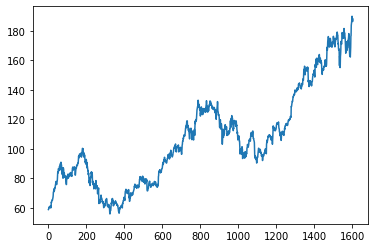

In [18]:
plt.plot(train_dataset)

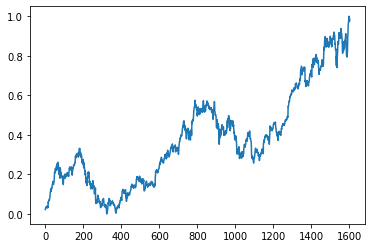

In [19]:
plt.plot(scaled_train)

In [20]:
scaled_test = scaler.transform(test_dataset)

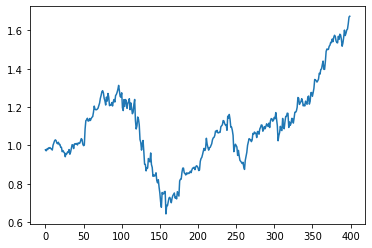

In [21]:
plt.plot(scaled_test)

# We create now the dataset for this task

We want to create a dtaset that it is able to see the previous S days of trading, and predict the trading of the next day

In [22]:
train_dataset

array([[ 58.74714279],
       [ 59.06285858],
       [ 59.71857071],
       ...,
       [188.1499939 ],
       [186.44000244],
       [188.17999268]])

In [23]:
def create_training_data(train_dataset, Seq):
    final_input = []
    result = []
    for t in range(Seq, len(train_dataset)):
#         at each time t we select the previous Seq values and we get as result t
        final_input.append(train_dataset[t-Seq:t])
        result.append(train_dataset[t])
    return np.asarray(final_input), np.asarray(result)

In [24]:
train_data, train_target = create_training_data(scaled_train, 60)

In [25]:
# for i in range(len(train_data)):
#     print(train_data[i])
#     print(train_target[i])
#     if i > 1:
#         break

In [26]:
train_data.shape

(1543, 60, 1)

In [27]:
train_target.shape

(1543, 1)

# LSTM in Keras

We implement he LST in Keras

In [28]:
import keras

Using TensorFlow backend.


In [29]:
# We start with the standard keras LSTM

In [30]:
model = keras.Sequential()

In [31]:
model.add(keras.layers.LSTM(50, return_sequences=True, input_shape = (60, 1)))

In [32]:
model.add(keras.layers.LSTM(50, return_sequences=False))

In [33]:
model.add(keras.layers.Dense(25))

In [34]:
model.add(keras.layers.Dense(1))

In [35]:
# Compile the model
model.compile(optimizer='adam', loss = 'mse')

In [36]:
# We fit
model.fit(train_data, train_target, batch_size=4, epochs=20)

Epoch 1/20
1543/1543 [==============================] - 24s 16ms/step - loss: 0.0029
Epoch 2/20
1543/1543 [==============================] - 15s 10ms/step - loss: 9.3847e-04
Epoch 3/20
1543/1543 [==============================] - 15s 10ms/step - loss: 8.3982e-04
Epoch 4/20
1543/1543 [==============================] - 29s 19ms/step - loss: 5.5620e-04
Epoch 5/20
1543/1543 [==============================] - 31s 20ms/step - loss: 4.6616e-04
Epoch 6/20
1543/1543 [==============================] - 19s 12ms/step - loss: 3.9389e-04
Epoch 7/20
1543/1543 [==============================] - 17s 11ms/step - loss: 3.3534e-04
Epoch 8/20
1543/1543 [==============================] - 21s 14ms/step - loss: 3.5179e-04
Epoch 9/20
1543/1543 [==============================] - 16s 11ms/step - loss: 3.0593e-04
Epoch 10/20
1543/1543 [==============================] - 17s 11ms/step - loss: 2.4335e-04
Epoch 11/20
1543/1543 [==============================] - 17s 11ms/step - loss: 2.9930e-04
Epoch 12/20
1543/1543 [

In [37]:
# test dataset

In [38]:
test_data, test_target = create_training_data(scaled_test, 60)

In [39]:
model.evaluate(x=test_data, y=test_target)

340/340 [==============================] - 0s 799us/step


0.0010278943570002036

In [40]:
prediction = model.predict(test_data)

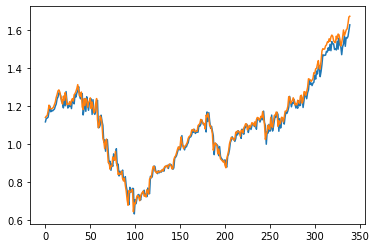

In [41]:
plt.plot(prediction)
plt.plot(test_target)
plt.show()

In [42]:
# We want to create the same model but in tensorflow

In [43]:
prediction = scaler.inverse_transform(prediction)

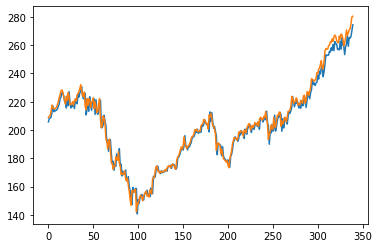

In [44]:
plt.plot(prediction)
plt.plot(test_dataset[60:])
plt.show()

In [45]:
# Another simple model
def model(seq):
#     We simply use a stupid regression
#     x[t+1] = 2*x[t]-x[t-1]
    result = []
    for i in range(2, len(seq)):
        result.append(2.*seq[i-1]-seq[i-2])
    return np.asarray(result)

In [46]:
simple_pred = model(test_dataset)

In [47]:
print(len(simple_pred))
print(len(test_dataset[2:]))

398
398


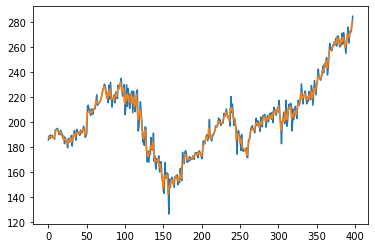

In [48]:
plt.plot(simple_pred)
plt.plot(test_dataset[2:])
# plt.plot(test_dataset[:-1]-simple_pred)
plt.show()

# Fourier Series

We can use now a Fourier series expansion to compute the time series.

In [49]:
import scipy

In [148]:
# We compute the Fourier series
coefficients = np.fft.fft(scaled_train.reshape(len(scaled_train)))

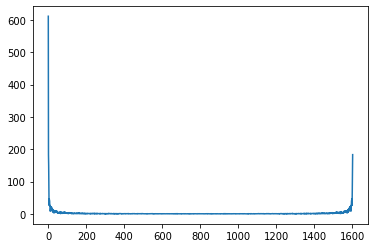

In [149]:
plt.plot(np.absolute(coefficients))

In [207]:
def filter_and_rescale(coef, low_filter = 0., high_filter = 0.):
    coef[coef<0.5] = 0
    low_lim = int(len(coef)*low_filter)
    high_lim = int(len(coef)*(1-high_filter))
    result = np.concatenate((np.zeros(low_filter), coef[low_lim:high_lim], np.zeros(len(coef)-high_lim)))
    assert len(result) == len(coef)
    return result

In [208]:
fft = filter_and_rescale(coefficients, low_filter=0, high_filter=0.)

In [209]:
len(fft)

1603

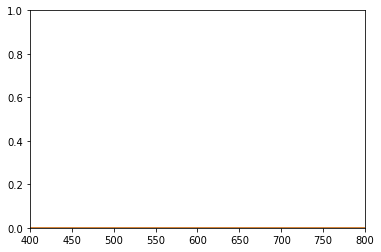

In [210]:
plt.xlim([400,800])
plt.ylim([0,1])
plt.plot(np.absolute(coefficients))
plt.plot(np.absolute(fft))
plt.show()

In [211]:
fft_pred = np.fft.ifft(coefficients, len(scaled_train))
fft_filter = np.fft.irfft(fft, len(scaled_train))

In [212]:
fft_pred = np.fft.irfft(coefficients, len(scaled_train)+len(scaled_test))
fft_filter = np.fft.irfft(np.pad(fft,(0, len(scaled_test)//2)))

In [213]:
def time_evolution(coeff, init_time):
    freq = np.fft.fftfreq(coeff.size, d=1)
    coeff  = np.multiply(coeff, np.exp(1.0j*freq*init_time))
    return coeff

In [214]:
t_evolved = time_evolution(fft, 0)

In [215]:
evo = np.fft.ifft(t_evolved, len(scaled_train))

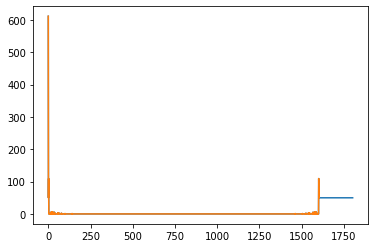

In [216]:
plt.plot(np.pad(fft, (0, len(scaled_test)//2), mode = 'edge'))
plt.plot(fft)

In [217]:
print(len(evo))
print(len(scaled_train))
print(len(scaled_test))

1603
1603
400


[]

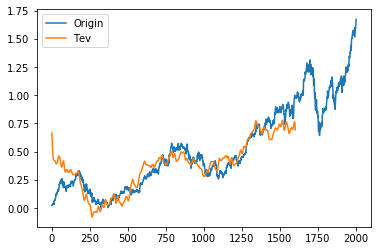

In [218]:
plt.plot(np.concatenate((scaled_train,scaled_test)), label = 'Origin')
plt.plot(evo, label = 'Tev')
# plt.plot(scaled_train, label = 'Orig')
# plt.plot(np.absolute(fft_pred))
# plt.plot(fft_pred)
plt.legend()
plt.plot()

### Returns
We compute the returns defined as 
*$
f(x) = \frac{x[t+1]-x[t]}{x[t]}
$*

In [54]:
def compute_return(closing):
    m = np.diff(closing, axis = 0)
    return m/closing[:-1]

In [55]:
predicted_returns = compute_return(prediction)

In [56]:
true_returns = compute_return(test_dataset[60:])

In [57]:
predicted_returns.reshape(340,1,1)

ValueError: cannot reshape array of size 339 into shape (340,1,1)

In [58]:
len(predicted_returns)

339

In [59]:
true_returns.shape

(339, 1)

In [60]:
from sklearn.metrics import r2_score

In [61]:
r2_score(true_returns, predicted_returns)

-1.5532397137925873

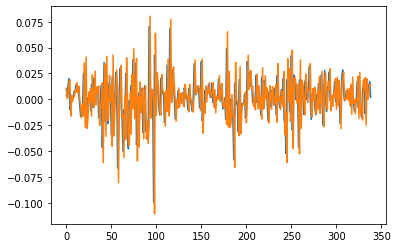

In [62]:
plt.plot(true_returns)
plt.plot(predicted_returns)
plt.show()

In [63]:
def filter(x, w):
    df = pd.DataFrame(x)
    df = df.rolling(w).mean()
    df = df.dropna()
    return df.to_numpy()

In [64]:
filtered_test = filter(test_dataset[60:], 10)

In [65]:
len(filtered_test)

331

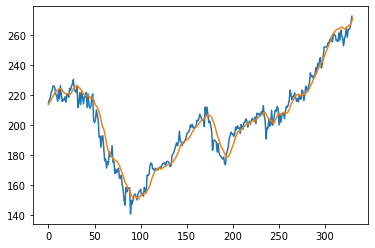

In [66]:
plt.plot(prediction[10:])
plt.plot(filtered_test)
plt.show()

In [67]:
true_returns = compute_return(filtered_test)

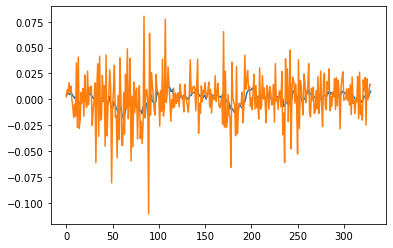

In [68]:
plt.plot(true_returns)
plt.plot(predicted_returns[9:])
plt.show()

In [69]:
r2_score(true_returns, predicted_returns[9:])

-14.178029460480333

In [70]:
simple_returns  = compute_return(simple_pred)

In [71]:
true_returns = compute_return(test_dataset)
r2_score(true_returns[2:], simple_returns)

-5.270951083452089

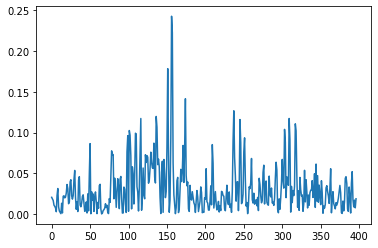

In [72]:
# plt.plot(true_returns[2:])
# plt.plot(simple_returns)
plt.plot(np.abs(simple_returns-true_returns[2:]))
plt.show()

In [73]:
r2_score(test_dataset[2:], simple_pred)

0.9693919759437924

In [74]:
r2_score(test_dataset[60:], prediction)

0.9774435588633615

In [77]:
zero_model = np.zeros(len(test_dataset))

In [79]:
r2_score(true_returns, zero_model[1:])

-0.00443655239347307

In [219]:
np.linspace(-10, 10, 1000)


TypeError: object of type <class 'float'> cannot be safely interpreted as an integer.